Ensemble Methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

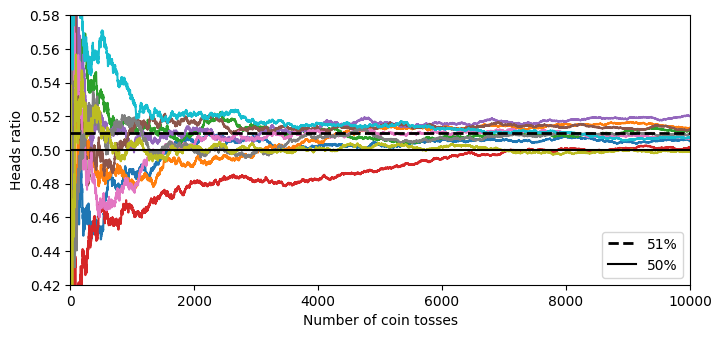

In [3]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
# save_fig("law_of_large_numbers_plot")
plt.show()

Ensemble Methods - Types

* Using Combination Of Different Models With Same Dataset.
* Same model with different subset of data.

### Combination Of Different Models


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
logistic_clf = LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svc_clf = SVC(gamma='scale',random_state=42)

In [6]:
voting_clf = VotingClassifier(estimators=[
    ('lr',logistic_clf),
    ('rf',rnd_clf),
    ('svc',svc_clf)
],
voting='hard'
)

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

In [9]:
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42)

In [10]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [11]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred = voting_clf.predict(X_test)

In [14]:
print('Ensemble Methods Accuracy:',accuracy_score(y_test,y_pred))

Ensemble Methods Accuracy: 0.912


In [16]:
for clf in (logistic_clf,rnd_clf,svc_clf):

    clf.fit(X_train,y_train)

    y_pred_clf = clf.predict(X_test)

    print('Accuracy Of The Individual Mode',clf.__class__.__name__,":",accuracy_score(y_test,y_pred_clf))

Accuracy Of The Individual Mode LogisticRegression : 0.864
Accuracy Of The Individual Mode RandomForestClassifier : 0.896
Accuracy Of The Individual Mode SVC : 0.896


In [17]:
voting_clf_soft = VotingClassifier(estimators=[
    ('lr',logistic_clf),
    ('rf',rnd_clf),
    ('svc',svc_clf)
],
voting='soft'
)

In [18]:
voting_clf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))],
                 voting='soft')

In [19]:
y_pred_soft = voting_clf_soft.predict(X_test)

AttributeError: This 'SVC' has no attribute 'predict_proba'

### Same model with different subset of data.

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators=500, max_samples=100 , 
                            n_jobs=-1, 
                            random_state=42)

In [22]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [23]:
y_pred_bag = bag_clf.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred_bag)

0.904

In [25]:
dec_clf = DecisionTreeClassifier(random_state=42)

In [26]:
dec_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred_tree = dec_clf.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred_tree)

0.856

### Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,
                                  n_jobs=-1 , random_state=42)

In [31]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [32]:
y_pred_rnd = rnd_clf.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred_rnd)

0.912

### Feature Importance

In [34]:
from sklearn.datasets import load_iris

In [35]:
iris = load_iris(as_frame=True)

In [36]:
rnd_clf = RandomForestClassifier(n_estimators=500,random_state=42)
rnd_clf.fit(iris.data,iris.target)


RandomForestClassifier(n_estimators=500, random_state=42)

In [37]:
for score, name in zip(rnd_clf.feature_importances_,iris.data.columns):

    print(f'Feature {name} has score of',score)

Feature sepal length (cm) has score of 0.11249225099876375
Feature sepal width (cm) has score of 0.02311928828251033
Feature petal length (cm) has score of 0.4410304643639577
Feature petal width (cm) has score of 0.4233579963547682


Other Ensemble Methods

* Adaboost
* Gradient Boosting
